In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from pydataset import data
from scipy import stats as stat

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

import lugo_wrangle as wl
import evaluate_oneil as eo

In [2]:
df = wl.get_wine_data()

In [3]:
df = wl.prep_wine_data(df)

In [9]:
df.shape

(6497, 14)

In [5]:
X_tr2, y_tr2, y_tr = eo.density_chlorides_cluster(df)

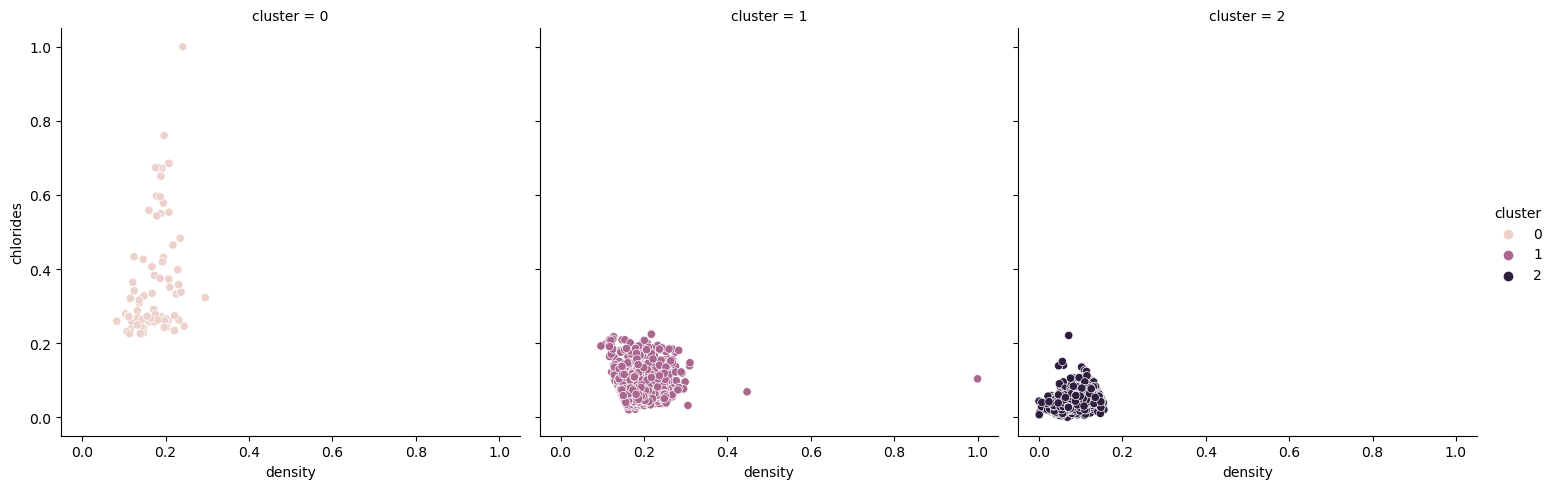

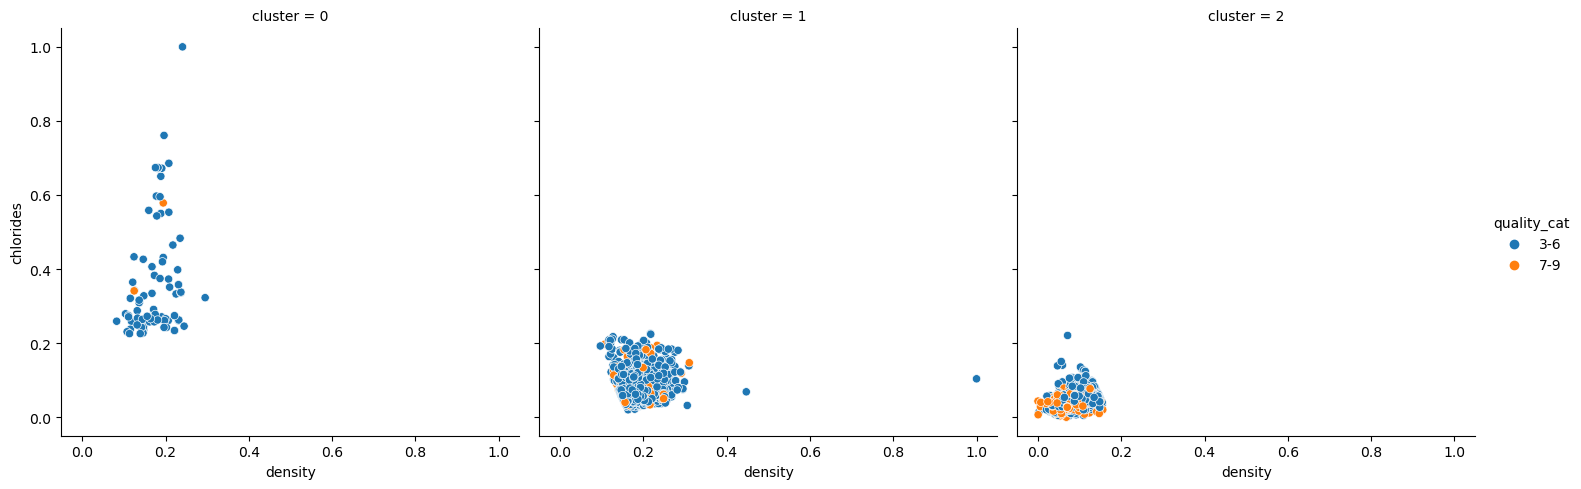

In [6]:
eo.density_chlorides_cluster_plot(X_tr2, y_tr2)

In [7]:
eo.density_chlorides_cluster_ttest(X_tr2, y_tr)

t-statistic: 18.328783407987107
p-value: 6.68000804315939e-30


# --Code below built above functions--

In [5]:
# drop the 'wine_type' column
df = df.drop('wine_type', axis=1)

In [6]:
tr, val, ts = wl.get_split(df)

In [7]:
target = 'quality'

In [8]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = wl.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [9]:
X_tr_sc, X_val_sc, X_ts_sc = wl.scale_data(X_tr,X_val,X_ts,to_scale)

In [10]:
baseline

5.812933025404157

## Clustering with the wine_quality dataset

* Using this lesson as a guide, perform clustering on the wine_quality dataset.

* Choose features other than the ones used in the lesson.

* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.

In [11]:
X_tr2 = X_tr[['density', 'chlorides']]

## Explore
* We explored all the things!

* hypothesize
* visualize
* statisticize
* summarize
* We found that age, annual_income, and spending score looked like were good canidates for clusters.

* We utilized the elbow method to determine the best number of clusters

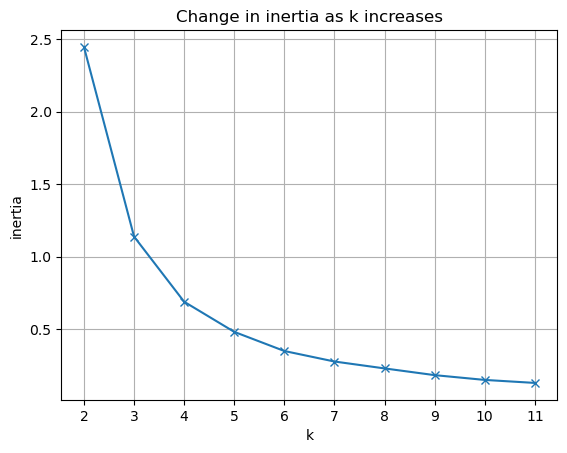

In [12]:
# lets plot inertia vs k
pd.Series(
    {k: KMeans(k, random_state=123, n_init=10)\
     .fit(X_tr2).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
plt.grid()

In [13]:
#make it
kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

#fit it
kmeans.fit(X_tr2)

#use it
kmeans.predict(X_tr2)

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [14]:
# And assign the cluster number to a column on the dataframe
X_tr2["cluster"] = kmeans.predict(X_tr2)
X_tr2.head()

,density,chlorides,cluster
3353,0.99140,0.042,0
2032,0.99380,0.108,1
6223,0.98988,0.032,0
2817,0.99300,0.027,0
1293,0.99672,0.084,1


In [15]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine
3353,6.4,0.160,0.28,2.2,0.042,33.0,93.0,0.99140,3.31,0.43,11.1,6,1
2032,7.2,0.550,0.09,1.5,0.108,16.0,151.0,0.99380,3.07,0.57,9.2,4,1
6223,6.4,0.400,0.25,4.2,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,1
2817,7.2,0.260,0.44,7.1,0.027,25.0,126.0,0.99300,3.02,0.34,11.1,8,1
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,0


* Step 1: Explore the clusters
* Step 2: Name the clusters
* Step 3:
* Option 1: Dimensionality reduction
* Option 2: Treat cluster names as a new target variable
* Option 3: Perform deeper EDA
* Option 4: Make many models

## Step 1: Explore the clusters

* see how they are similiar or different

### Density and Chlorides

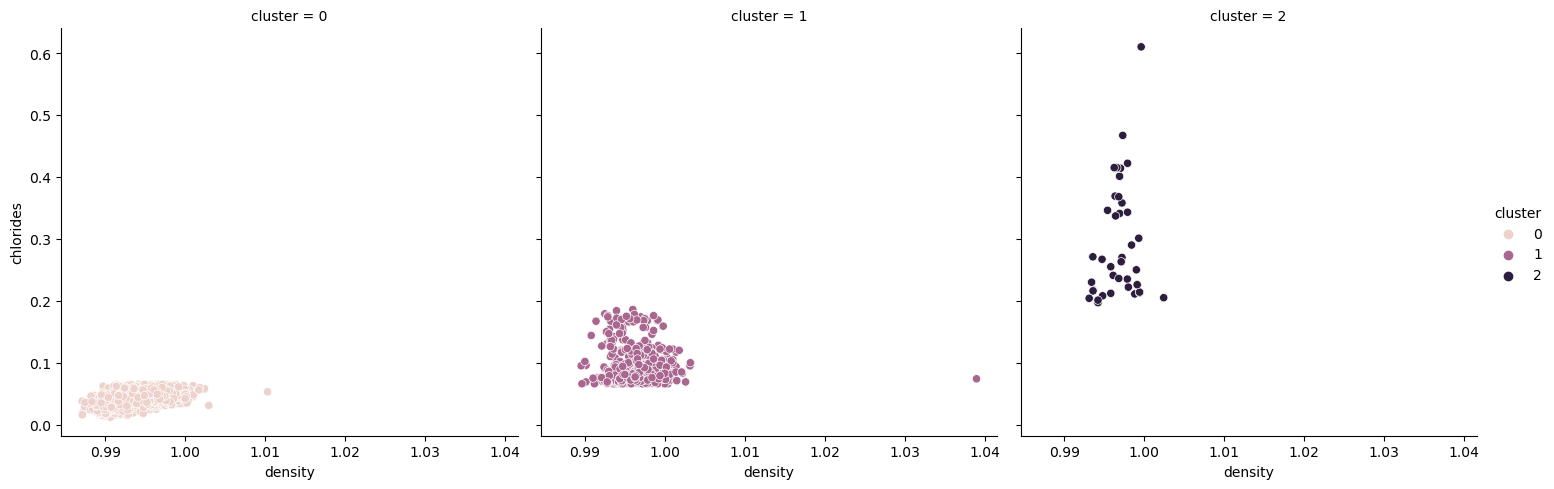

In [16]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=X_tr2,
           x='density',
           y='chlorides',
           hue='cluster',
           col='cluster',
           col_wrap=3)
plt.show()

In [17]:
# bin the 'quality' variable as 3-6 and 7-9
tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])

In [18]:
y_tr2 = tr[['quality_cat']]

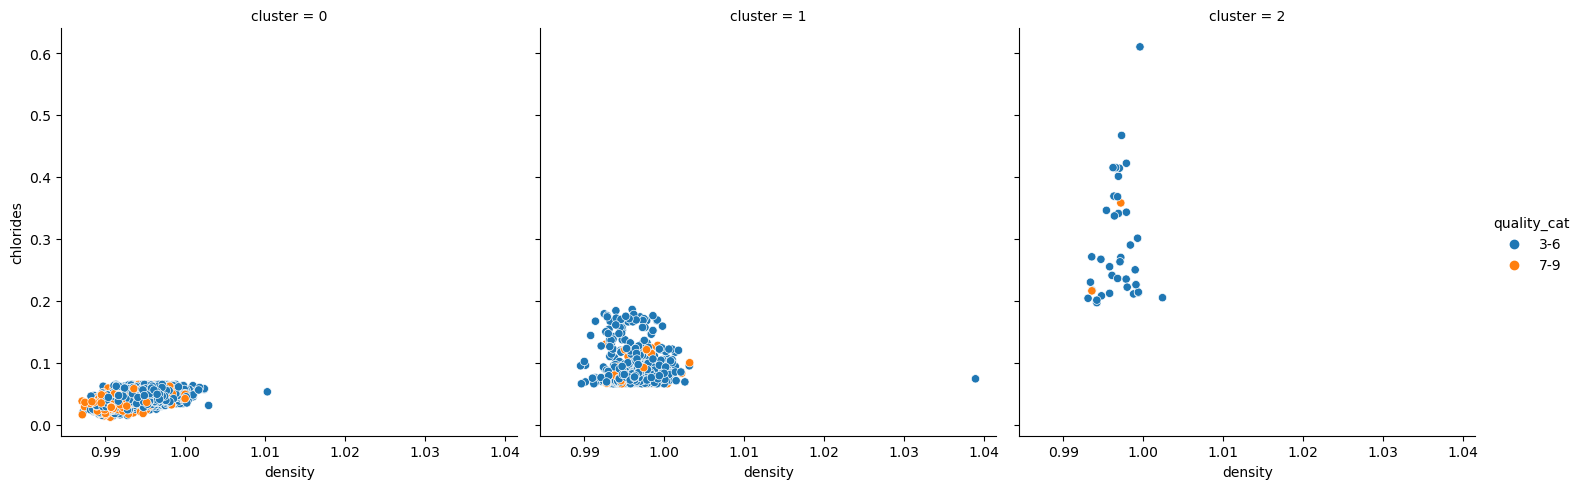

In [19]:
sns.relplot(data=X_tr2.join(y_tr2),
           x='density',
           y='chlorides',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)
plt.show()

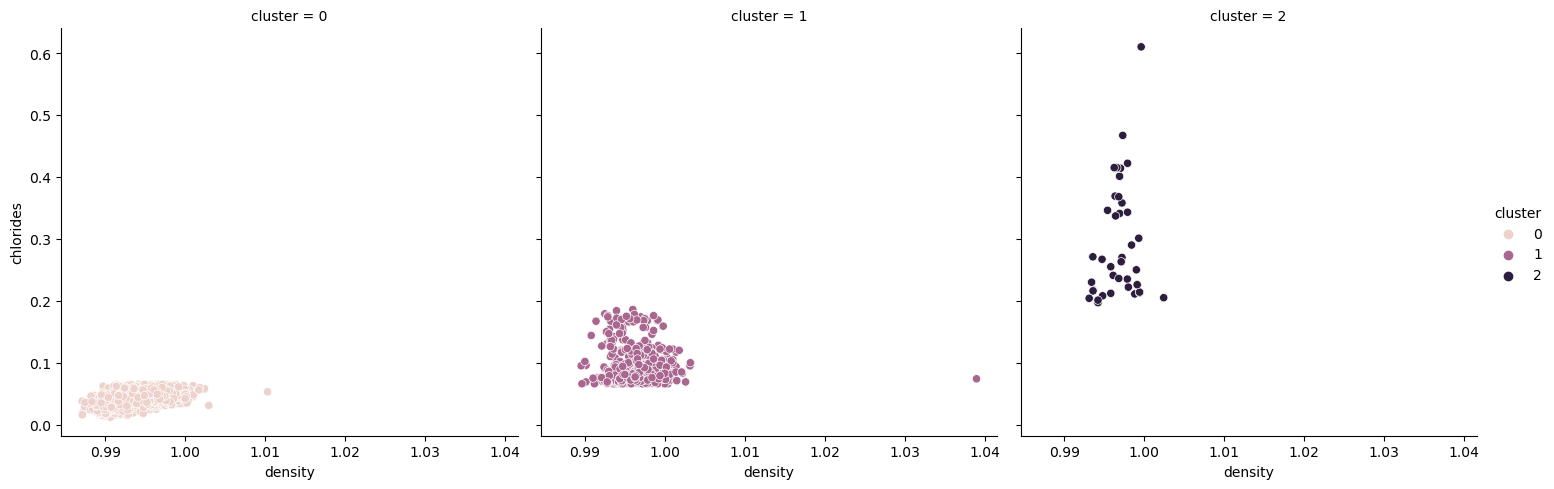

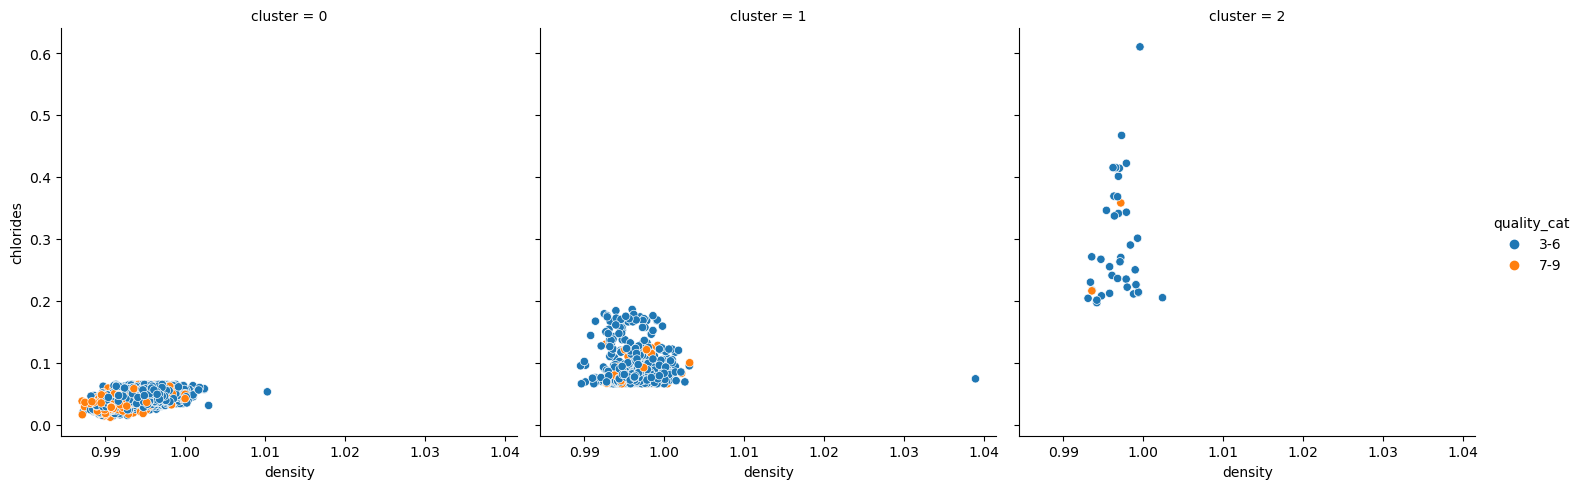

In [20]:
# create the first scatter plot
sns.relplot(data=X_tr2,
           x='density',
           y='chlorides',
           hue='cluster',
           col='cluster',
           col_wrap=3)

# create the second scatter plot
sns.relplot(data=X_tr2.join(y_tr2),
           x='density',
           y='chlorides',
           hue='quality_cat',
           col='cluster',
           col_wrap=3)

# show the plots
plt.show()

#rename using map
tr['cluster'] = X_tr2.cluster.map({
    0:'low_chloride_low_density_chlorides',
    1:'high_chloride_high_density_chlorides',
    2:'med_chloride_med_density_chlorides'
})

In [24]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine,quality_cat,cluster
3353,6.4,0.160,0.28,2.2,0.042,33.0,93.0,0.99140,3.31,0.43,11.1,6,1,3-6,low_chloride_low_density_chlorides
2032,7.2,0.550,0.09,1.5,0.108,16.0,151.0,0.99380,3.07,0.57,9.2,4,1,3-6,high_chloride_high_density_chlorides
6223,6.4,0.400,0.25,4.2,0.032,15.0,91.0,0.98988,3.26,0.52,13.1,6,1,3-6,low_chloride_low_density_chlorides
2817,7.2,0.260,0.44,7.1,0.027,25.0,126.0,0.99300,3.02,0.34,11.1,8,1,7-9,low_chloride_low_density_chlorides
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4,0,3-6,high_chloride_high_density_chlorides


In [21]:
y_tr_temp_df = pd.DataFrame(y_tr)
y_tr_temp_df.head()
temp_df = pd.concat ([X_tr2, y_tr], axis = 1)
temp_df.head()

,density,chlorides,cluster,quality
3353,0.99140,0.042,0,6
2032,0.99380,0.108,1,4
6223,0.98988,0.032,0,6
2817,0.99300,0.027,0,8
1293,0.99672,0.084,1,4


In [22]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 3353 to 548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   density    3897 non-null   float64
 1   chlorides  3897 non-null   float64
 2   cluster    3897 non-null   int32  
 3   quality    3897 non-null   int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 266.0 KB


#rename using map
temp_df['cluster'] = X_tr2.cluster.map({
    0:'low_chloride_low_density_chlorides',
    1:'high_chloride_high_density_chlorides',
    2:'med_chloride_med_density_chlorides'
})

In [23]:
temp_df

,density,chlorides,cluster,quality
3353,0.99140,0.042,0,6
2032,0.99380,0.108,1,4
6223,0.98988,0.032,0,6
2817,0.99300,0.027,0,8
1293,0.99672,0.084,1,4
...,...,...,...,...
4918,0.99168,0.047,0,5
3542,0.99680,0.041,0,5
1884,0.99610,0.056,0,5
2206,0.99650,0.049,0,5


### Stat T Test

* $H0$: Mean of low density, low chloride <= Mean of quality
* $Ha$ : Mean of low density, low chloride > Mean of quality

kmeans.fit(tr.drop(columns=['quality', 'quality_cat', 'cluster']))

# And assign the cluster number to a column on the dataframe
tr["cluster"] = kmeans.predict(tr.drop(columns=['quality', 'quality_cat', 'cluster']))
tr.head()

subset_df = temp_df[temp_df['cluster'] == 'low_chloride_low_density_chlorides']

# Perform the t-test
t_stat, p_value = stat.ttest_1samp(subset_df['quality'], popmean=temp_df['quality'].mean())

# Print the results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

# Subset the DataFrame to include only the 'low_chloride_low_density_chlorides' cluster
subset_df = temp_df[temp_df['cluster'] == 'low_chloride_low_density_chlorides']

# Perform the t-test
t_stat, p_value = stat.ttest_1samp(subset_df['quality'], popmean=temp_df['quality'].mean())

# Convert to two-tailed test
p_value *= 2

# Print the results
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

low_chloride_low_density_chlorides = temp_df[temp_df['cluster'] == 'low_chloride_low_density_chlorides']
high_chloride_high_density_chlorides = temp_df[temp_df['cluster'] == 'high_chloride_high_density_chlorides']

t_stat, p_value = stat.ttest_ind(low_chloride_low_density_chlorides, high_chloride_high_density_chlorides, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value * 2) # multiply p-value by 2 for a two-tailed test

In [24]:
cluster_0 = temp_df[temp_df['cluster'] == 0][temp_df.columns[1]].astype(float)
cluster_2 = temp_df[temp_df['cluster'] == 2][temp_df.columns[1]].astype(float)

t_stat, p_value = stat.ttest_ind(cluster_0, cluster_2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value * 2) # multiply p-value by 2 for a two-tailed test

t-statistic: -17.193815921452412
p-value: 4.7061565964694246e-20


In [ ]:

def density_chlorides_cluster(df):
    '''This function will take in wine data named df, split, and X_train split. Then scale. K-means make, fit, and use. It will create a cluster then chart the density and chlorides. .'''
    
    
    # drop the 'wine_type' column
    df = df.drop('wine_type', axis=1)
    
    tr, val, ts = wl.get_split(df)
    
    target = 'quality'
    
    X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = wl.get_Xs_ys_to_scale_baseline(tr, val, ts, target)
    
    X_tr_sc, X_val_sc, X_ts_sc = wl.scale_data(X_tr,X_val,X_ts,to_scale)
    
    X_tr2 = X_tr_sc[['density', 'chlorides']]
    
    #make it
    kmeans = KMeans(n_clusters = 3, random_state=123, n_init=10)

    #fit it
    kmeans.fit(X_tr2)

    #use it
    kmeans.predict(X_tr2)
    
    # And assign the cluster number to a column on the dataframe
    X_tr2["cluster"] = kmeans.predict(X_tr2)
    
    # bin the 'quality' variable as 3-6 and 7-9
    tr['quality_cat'] = pd.cut(tr['quality'], bins=[2, 6, 9], labels=['3-6', '7-9'])
    
    y_tr2 = tr[['quality_cat']]
    
    return    
 
def density_chlorides_cluster_plot():
    '''Then combine relplots of clusters with binned quality'''
    
    # create the first scatter plot
    sns.relplot(data=X_tr2,
               x='density',
               y='chlorides',
               hue='cluster',
               col='cluster',
               col_wrap=3)

    # create the second scatter plot
    sns.relplot(data=X_tr2.join(y_tr2),
               x='density',
               y='chlorides',
               hue='quality_cat',
               col='cluster',
               col_wrap=3)

    # show the plots
    plt.show()
       
def density_chlorides_cluster_ttest(X_tr2, y_tr):
    
    y_tr_temp_df = pd.DataFrame(y_tr)
    y_tr_temp_df.head()
    temp_df = pd.concat ([X_tr2, y_tr], axis = 1)
    
    
    cluster_0 = temp_df[temp_df['cluster'] == 0][temp_df.columns[1]].astype(float)
    cluster_2 = temp_df[temp_df['cluster'] == 2][temp_df.columns[1]].astype(float)

    t_stat, p_value = stat.ttest_ind(cluster_0, cluster_2, equal_var=False)

    print("t-statistic:", t_stat)
    print("p-value:", p_value * 2) # multiply p-value by 2 for a two-tailed test